## PyTorch Workflow 

Let's explore an example PyTorch end to end workflow.

Resources:
- https://www.learnpytorch.io/

In [402]:
what_we_covering = {
    1 : "data (prepare and load)",
    2 : "build model",
    3 : "fit model to data (training)",
    4 : "make predictions and evaluate model (inference)",
    5 : "save and load best model",
    6 : "putting it all together"
}
what_we_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fit model to data (training)',
 4: 'make predictions and evaluate model (inference)',
 5: 'save and load best model',
 6: 'putting it all together'}

In [403]:
import torch
from torch import nn ## nn contains all of PyTorch's building blocks for nerual networks
import matplotlib.pyplot as plt

# Check PyTorch version
print(torch.__version__)


2.7.1


### 1. Data Preparation and Loading

Data can be anything in machine learning. 

* Excel spreadsheet
* Images of any kind
* Videos ( Youtube has alot of data)
* Audio like songs or podcasts
* DNA
* Text

Machine Learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some **known** data using the linear
regression formula - https://byjus.com/linear-regression-formula/

`y = a + bx`

We'll use linear regression formula to make straight line with known **parameters**.


In [404]:
import torch
# Create known parameters
weight = 0.7
bias = 0.3

# Create
start = 0 
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = bias + weight * X 
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [405]:
len(X), len(y)

(50, 50)

#### Splitting data into training and test data sets (one of the most important concepts in machine learning in general)

Let's create a training and test data sets with our data

In [406]:
# Create a train/test split

train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split], y[:train_split]
X_test , y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

how might we better visualize our data?

This is where the data explor's motto come in.

"Visualize, visualize, visualize"

In [407]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    """Plots training data, test data and compares predictions."""
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')

    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')
    
    # Show the legend
    plt.legend(prop={'size': 14})


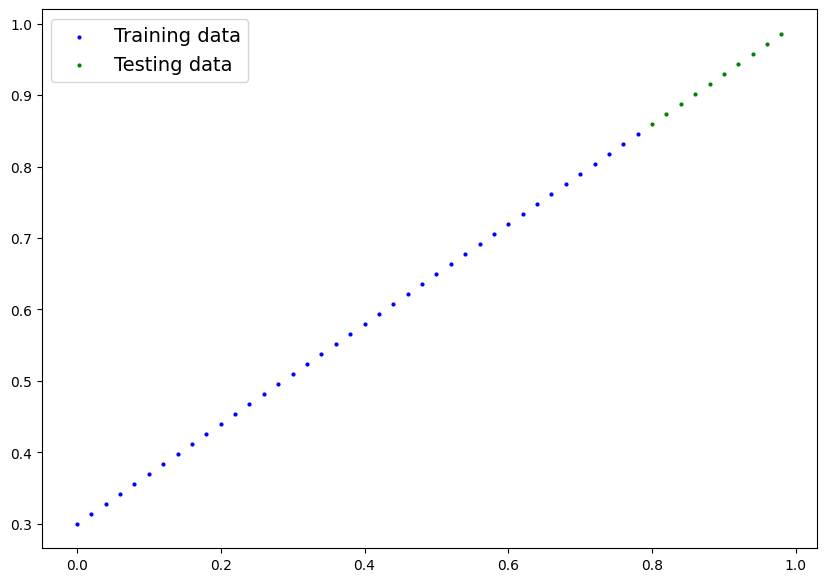

In [408]:
plot_predictions()

### 2. Build Model

Our first PyTorch model

What our model does:
* Start with random values (weights & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weights & bias value we used to create the data)

How does it do so?
Through two main algorithms:
1. Gradient Descent - https://www.youtube.com/watch?v=IHZwWFHWa-w
2. Backpropagation - https://www.youtube.com/watch?v=Ilg3gGewQ5U

What is Gradient Descent? quick explaination

Imagine a Hill and a Ball

* Think of a mountain (this is your loss function).

* You place a ball on the mountain (this is your model parameter, e.g. weight w).

* The ball wants to roll downhill to the lowest valley (the minimum loss).

But:
 * The ball doesn’t know where the bottom is.
 * It only knows the slope at its current position.

That’s what gradient means: the slope of the hill.

 What Gradient Descent Does

1. Compute the slope at the ball’s position (gradient).

2. Move a small step in the opposite direction of the slope.

* Because slope points uphill, so we go downhill.

3. Repeat many times until the ball reaches the bottom.

That’s it! 

In [409]:

from torch import nn

# Create linear regression model class

class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))

    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights * x + self.bias # <- this is the linear regression formula



#### PyTorch Model building essentials

* `torch.nn` - contains all of the building for computational graph ( a neural network can be considered as a computational graph)
* `torch.nn.Parameter` - what parameters the model should try to learn often a PyTorch layer from torch.nn will set these for us
* `torch.nn.Module` - the base class for all neural networks, if you subclass it, you should override the forward() method
* `torch.optim` - this where the optimizer in PyTorch live, they will help with gradient descent
* `def forward()` - All nn.Module subclasses require you to overwrite forward(), this method defines what happen in the forward computation


#### Check the contents of our PyTorch models

In [410]:
# Create random seed

torch.manual_seed(42)

# Create an instance of LinearRegressionModel
model_0 = LinearRegressionModel()

# Checkout the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [411]:
# List name parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [412]:
weight , bias

(0.7, 0.3)

#### Marking predictions using `torch.inference_mode()`

To check our model's preductive performance, let's see how well it predicts `y_test` base on `X_test`.

When we pass data to our model, its going to run it through the `forward()` function.

In [413]:
X_test, y_test 

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [414]:
# Make predictions with inference mode
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [415]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# You can also do something similar with torch.no_grad(), however torch.inference_mode() is preferred
# with torch.no_grad():
#     y_preds = model_0(X_test)
    
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [416]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

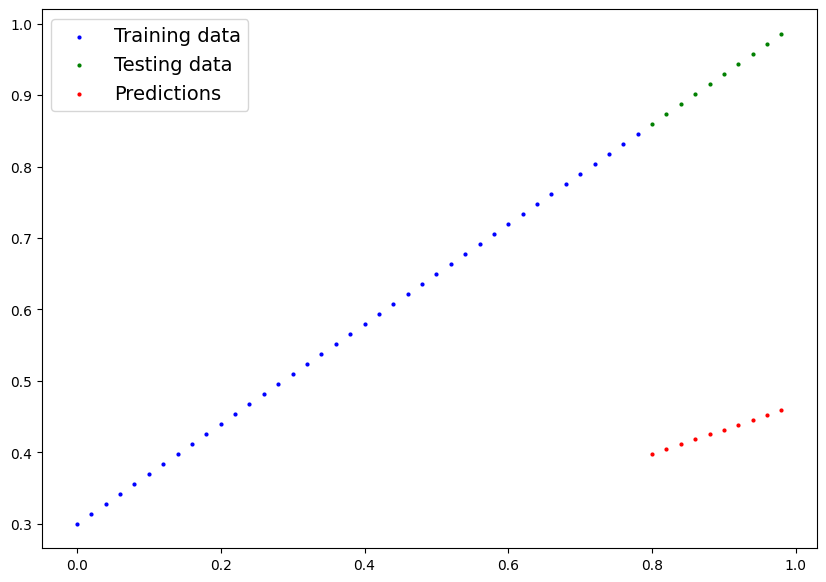

In [417]:
plot_predictions(predictions=y_preds)

### 3. Train Model

The whole idea of training is for a model to move from some *unknonw* parameters (these may be random) to some *known* parameters
or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor to how wrong your models predictions are is to use a loss function.

**Notes**: Loss functions may also be called cost functions or criterion functions in different areas.

Things we need to train:
* **Loss Function**: A function to measure how wrong your model's predictions are to the ideal outputs - https://docs.pytorch.org/docs/stable/nn.html#loss-functions

* **Optimizer**: Takes into account the loss of a model and adjusts the models parameters (e.g. weight & bias) to improve the loss. - https://docs.pytorch.org/docs/stable/optim.html

A specifically for PyTorch we need:

1. Training loop
2. Testing loop 

In [418]:
model_0.parameters

<bound method Module.parameters of LinearRegressionModel()>

In [419]:
# Setup loss function 
loss_fn = nn.L1Loss()

# Setup  Optimizer ( Stochastic Gradient Descent )
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.01) # lr is the learning rate = possibly the most important hyperparameter

#### Building Training loop (and testing loop) in PyTorch

1. Loop through data 
2. Forward pass (this is where the data moves through our model `forward()`) 
3. Calculate the loss (how wrong your model is) 
4. Optimizer zero grad
5. Loss backward pass (this is where the model learns) (**backpropagation**)
6. Optimizer step (this is where the model updates its parameters) (**gradient descent**)


In [420]:
# An epoch is one loop through all of the data
epochs = 200

# Track different values 
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 1 loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients
    
    # 1 Forward pass
    y_pred = model_0(X_train)

    # 2 Calculate loss (compare model predictions to actual values)
    loss = loss_fn(y_pred, y_train)

    # 3 Optimizer zero grad
    optimizer.zero_grad()

    # 4 Perform backpropagation on the loss with respect to the model parameters
    loss.backward()

    # 5 Step the optimizer
    optimizer.step()

    ### Testing
    model_0.eval()  # turn off different setting in the model not need for evaluation/test
    with torch.inference_mode(): # turn off gradient tracking and backpropagation
        # 1 Forward pass
        test_pred = model_0(X_test)

        # 2 Calculate loss (compare model predictions to actual values)
        test_loss = loss_fn(test_pred, y_test)

    # Print out model state dict
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss.item())
        test_loss_values.append(test_loss.item())
        print(f"Epoch: {epoch} | Test {loss} | Test loss: {test_loss}")
        # Print out model state dict
        print(model_0.state_dict())

Epoch: 0 | Test 0.31288135051727295 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Test 0.1976713389158249 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Test 0.08908725529909134 | Test loss: 0.2172965705394745
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Test 0.053148530423641205 | Test loss: 0.14464019238948822
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Test 0.04543796554207802 | Test loss: 0.11360953748226166
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Test 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Test 0.03818932920694351 | Test loss: 0.08886633813381195
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
Ep

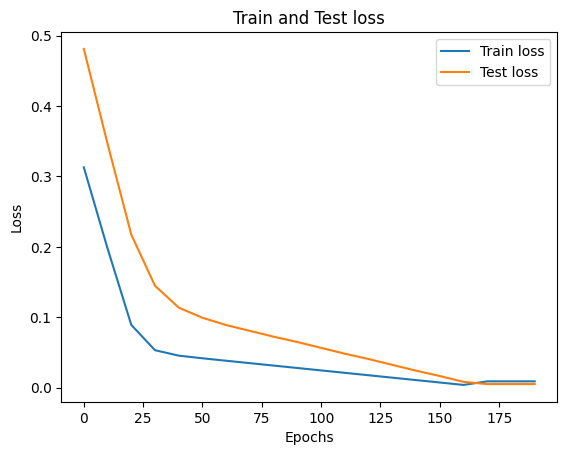

In [421]:
plt.plot(epoch_count, loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Train and Test loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [422]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

In [423]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [424]:
weight, bias

(0.7, 0.3)

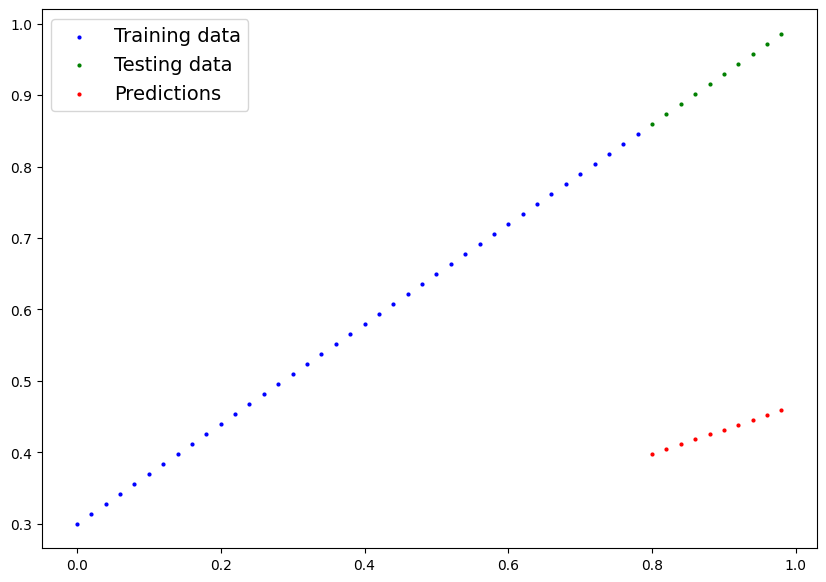

In [425]:
plot_predictions(predictions=y_preds)

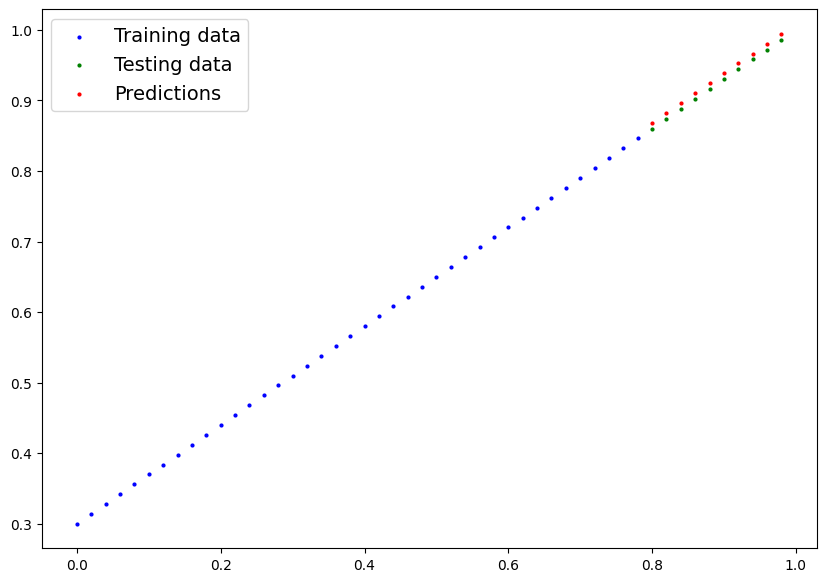

In [426]:
plot_predictions(predictions=y_preds_new)

### 4. Save a model in PyTorch

There are three main methods you should know about saving and loading in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - allows you to load a model's parameter


PyTorch Save and Load - https://pytorch.org/tutorials/beginner/saving_loading_models.html


In [427]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

MODEL_SAVE_PATH 

Saving model to: models/01_pytorch_workflow_model_0.pth


PosixPath('models/01_pytorch_workflow_model_0.pth')

In [428]:
!ls -l models/

total 8
-rw-r--r--@ 1 aungsan  staff  2117 Sep 10 03:54 01_pytorch_workflow_model_0.pth


### 5. Loading the PyTorch model

Since we saved our model's `state_dict` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict` into it.

In [429]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [430]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 =  LinearRegressionModel()

# load the state_dict of model_0 (this will upate the new instance with new parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [431]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [432]:
# Make some predictions with our loaded model 
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [433]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds


tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [434]:
# Compare loaded model predictions with original model predictions
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### 6. Putting it all together

Let's go back through the step above and see it all in one places

In [511]:
# import PyTorch and Matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
print(torch.__version__)


2.7.1


Create device agnostic code.

This mean if we've got access to a GPU ,our code will use it. If not, it will use CPU.

In [512]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.mps.is_available() else "cpu"
print(f"Using device: {device}")

Using device: mps


#### 6.1 Data

In [513]:
# Create some data using linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range value
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, this returns a error
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [514]:
# Split data
train_split = int (0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]

X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [515]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    """Plots training data, test data and compares predictions."""
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')

    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')
    
    # Show the legend
    plt.legend(prop={'size': 14})


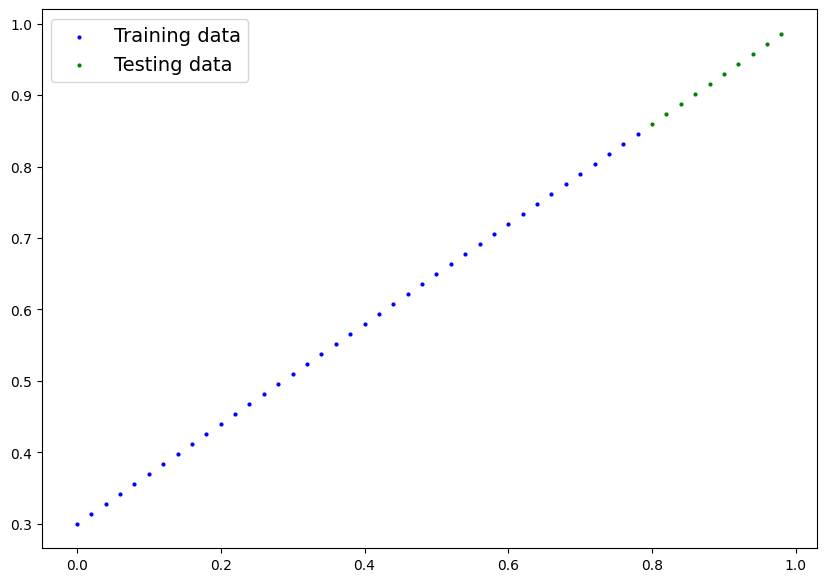

In [516]:
# Plot the data
# Note : if you dont have the plot_predictions function loaded , this will throw an error
plot_predictions(X_train, y_train, X_test, y_test)

#### 6.2 Building a Pytorch Linear Model

In [517]:
# Create a linear model by subclassing nn.Module

class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [518]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [519]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='mps', index=0)

#### 6.3 Training 
For training we need to define

1. Loss function
2. Optimizer
3. Training loop
4. Testing loop


In [520]:
# setup the loss function 
loss_fn = nn.L1Loss() # same as MAE

# setup the optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [521]:
# Let write training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()
    
    # 1. Forward pass
    y_pred = model_1(X_train)
    
    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)
    
    # 3. Zero grad
    optimizer.zero_grad()
    
    # 4. Backprop
    loss.backward()
    
    # 5. Step optimizer
    optimizer.step()
    
    ### Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Test {loss} | Test loss: {test_loss}")    
    


Epoch: 0 | Test 0.5551779270172119 | Test loss: 0.5739762783050537
Epoch: 10 | Test 0.4399681091308594 | Test loss: 0.4392664134502411
Epoch: 20 | Test 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Test 0.20954833924770355 | Test loss: 0.16984672844409943
Epoch: 40 | Test 0.09433844685554504 | Test loss: 0.03513688966631889
Epoch: 50 | Test 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Test 0.019956793636083603 | Test loss: 0.04580312967300415
Epoch: 70 | Test 0.016517985612154007 | Test loss: 0.037530578672885895
Epoch: 80 | Test 0.013089167885482311 | Test loss: 0.02994491532444954
Epoch: 90 | Test 0.009653175249695778 | Test loss: 0.02167237363755703
Epoch: 100 | Test 0.006215682718902826 | Test loss: 0.014086711220443249
Epoch: 110 | Test 0.002787243574857712 | Test loss: 0.005814170930534601
Epoch: 120 | Test 0.0012645088136196136 | Test loss: 0.013801807537674904
Epoch: 130 | Test 0.0012645088136196136 | Test loss: 0.013801807537674904
Epoch:

In [522]:
model_1.state_dict(), weight, bias

(OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='mps:0')),
              ('linear_layer.bias', tensor([0.3025], device='mps:0'))]),
 0.7,
 0.3)

#### 6.4 Making and Evaluating Predictions

In [523]:
# Turn a model into eval mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='mps:0')

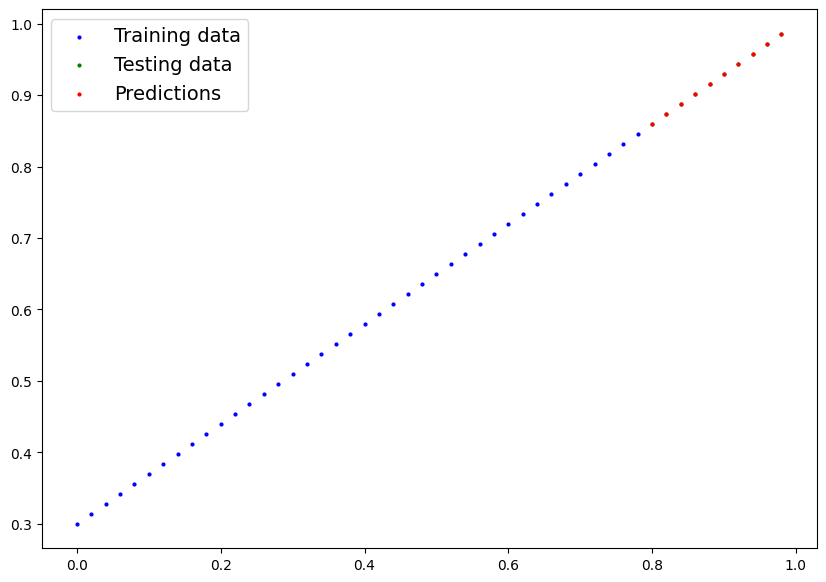

In [524]:
# Check out model predictions visually
plot_predictions(predictions=y_preds.cpu())

#### 6.5 Saving and Loading Models

In [525]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

MODEL_SAVE_PATH 

Saving model to: models/01_pytorch_workflow_model_1.pth


PosixPath('models/01_pytorch_workflow_model_1.pth')

In [526]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='mps:0')),
             ('linear_layer.bias', tensor([0.3025], device='mps:0'))])

In [527]:
# Loaded PyTorch model

# Create a new instance of linear regression model v2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put loaded model to device
loaded_model_1.to(device)


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [528]:
# Evaluated loaded model

loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='mps:0')